# Improving Data Visualization with Seaborn

## What is Seaborn?
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

## Why Use Seaborn?
Seaborn simplifies complex visualizations with minimal code and enhances default visuals by applying aesthetically pleasing styles and context-aware features.

## Dataset: Palmer Penguins
The dataset provides size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. This data can be found in the GitHub repo.

## Project Goal
The goal is to demonstrate how to improve basic plots using Seaborn by applying best practices from class to make visualizations more effective and informative.
> "Graphical excellence is that which gives to the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space." -Edward Tufte  



## Data Loading

In [113]:
# Imports needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("penguins (1).csv")

# Show raw data preview
df.head()


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Chinstrap,46.7,17.9,195.0,3300.0
1,Adelie,35.9,16.6,190.0,3050.0
2,Adelie,36.6,17.8,185.0,3700.0
3,Adelie,37.8,18.3,174.0,3400.0
4,Adelie,35.5,17.5,190.0,3700.0


## Plot 1: Box Plot
### Exploring Penguin Body Mass Across Species

This visualization explores how body mass differs between penguin species. 
We will first show a default Seaborn plot with minimal customization, then 
redesign the plot using best practices in data visualization to improve clarity, 
reduce chartjunk, and better communicate the underlying structure in the data.



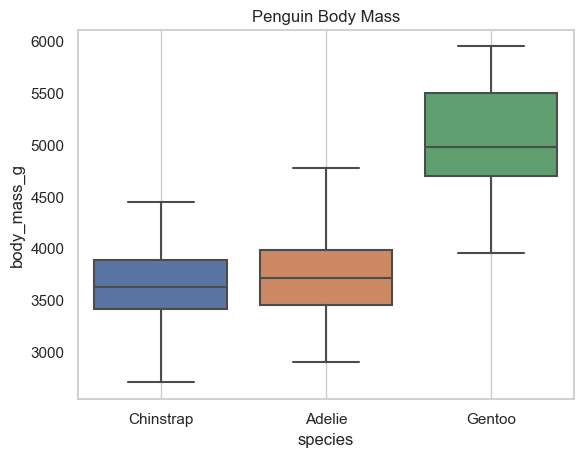

In [114]:
# Simple plot
sns.boxplot(x="species", y="body_mass_g", data=df)
plt.title("Penguin Body Mass")
plt.grid()
plt.show()


### Why this Plot is Ineffective

- **Colors are arbitrary** and do not convey meaningful information.
- **Title is vague**, offering little guidance on the plot’s purpose.
- **No axis labels or units** makes interpretation harder for the viewer.
- **Default styling** (including unnecessary gridlines and borders) adds visual noise.


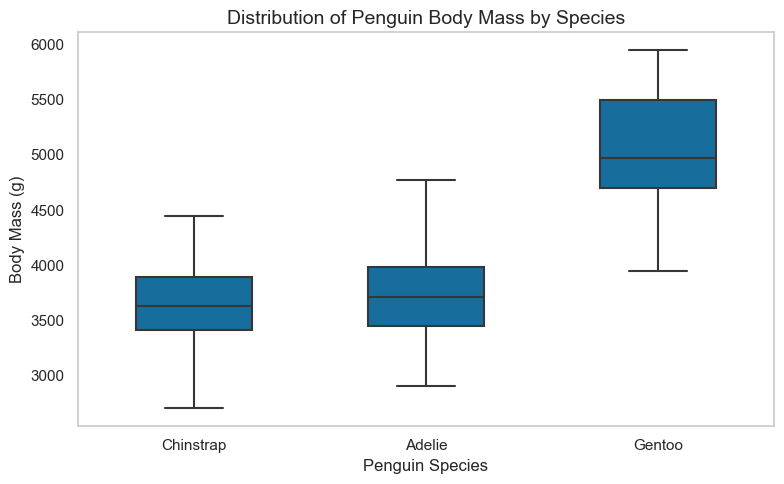

In [115]:
# Improved plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="body_mass_g", data=df, color = sns.color_palette("colorblind")[0], width=0.5)

# Add better title and labels
plt.title("Distribution of Penguin Body Mass by Species", fontsize=14)
plt.xlabel("Penguin Species", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)

plt.tight_layout()
plt.grid(False)
plt.show()





### Improvements:

- **Data-Ink Ratio (Tufte)**: Non-essential ink (thick borders, colored boxes) is removed to emphasize data over decoration.
- **Clarity**: Axis labels include units; only one color is used so that shape is main primary cue.
- **Minimal Chartjunk**: By reducing clutter and unnecessary styling, we allow the data’s structure to speak for itself.

### What Seaborn Features Were Used to Improve the Plot

- `sns.boxplot` to create the boxplot.
- `color=sns.color_palette("colorblind")[0]` applies a colorblind-safe palette to ensure the plot is accessible to all viewers.
- `width=0.5` reduces the width of each box to create more negative space between categories, improving legibility.
- `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` adds a descriptive title and clearly labeled axes with units - helping viewers interpret the chart without guessing.
- `plt.tight_layout()`  ensures proper spacing so that labels and elements don't overlap, keeping the visual presentation clean.


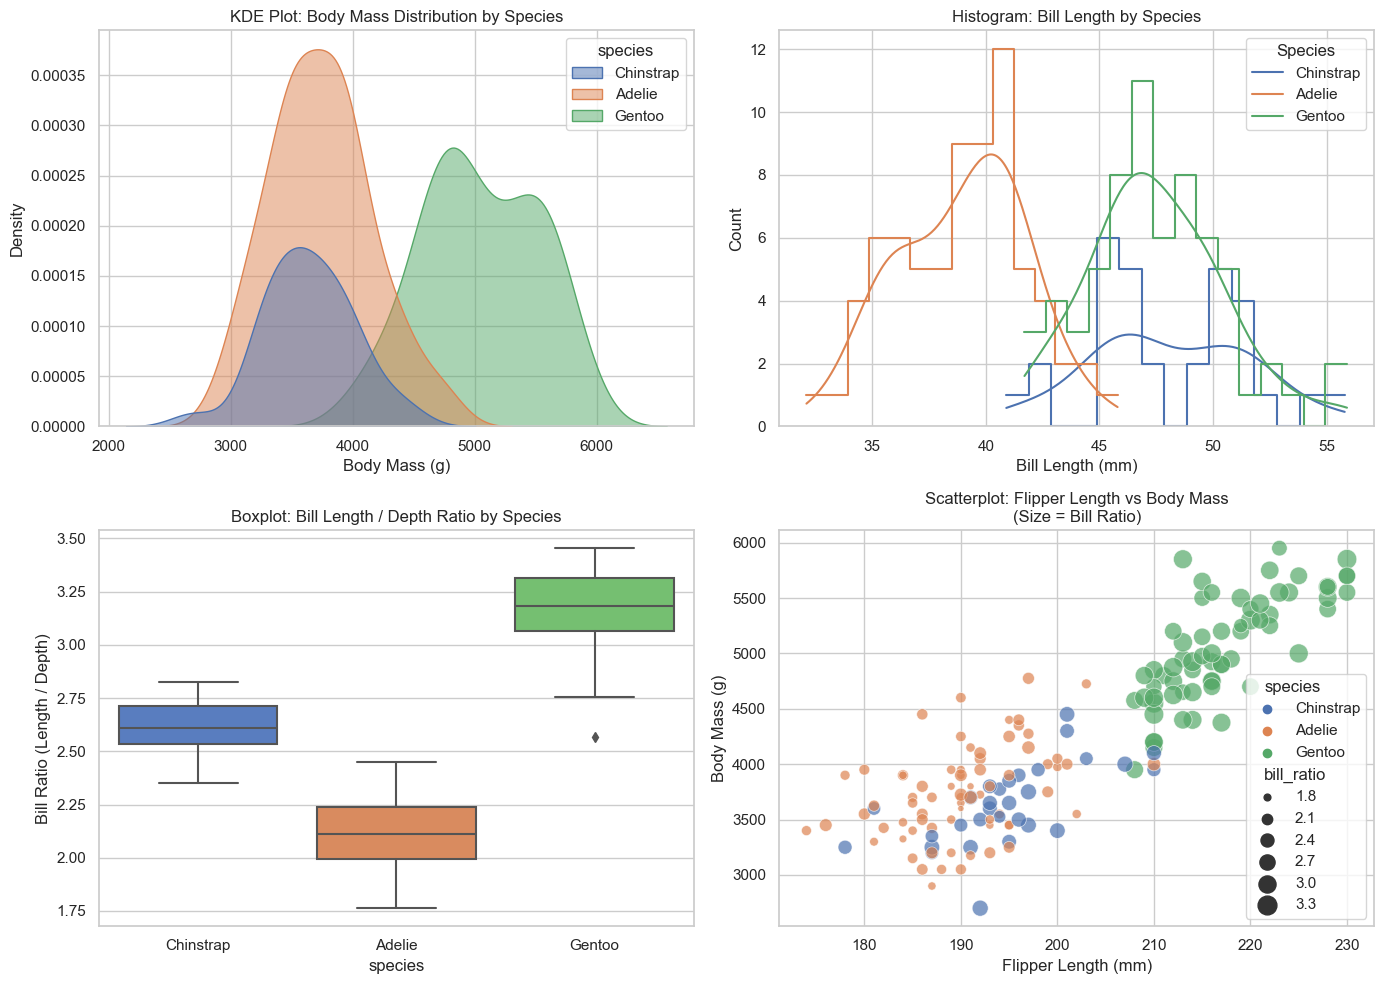

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

# Drop NA rows to avoid issues
df = df.dropna()

# Create derived variable: bill shape ratio
df["bill_ratio"] = df["bill_length_mm"] / df["bill_depth_mm"]

# Set style
sns.set(style="whitegrid")

# Initialize figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Option 1: KDE Plot (Body Mass by Species)
sns.kdeplot(data=df, x="body_mass_g", hue="species", fill=True, alpha=0.5, ax=axs[0])
axs[0].set_title("KDE Plot: Body Mass Distribution by Species")
axs[0].set_xlabel("Body Mass (g)")
axs[0].set_ylabel("Density")

# Option 2: Small Multiples (Bill Length Histograms by Species)
for species in df["species"].unique():
    sns.histplot(df[df["species"] == species]["bill_length_mm"], kde=True, label=species, ax=axs[1], bins=15, element="step", fill=False)
axs[1].set_title("Histogram: Bill Length by Species")
axs[1].set_xlabel("Bill Length (mm)")
axs[1].set_ylabel("Count")
axs[1].legend(title="Species")

# Option 3: Bill Ratio Boxplot by Species
sns.boxplot(data=df, x="species", y="bill_ratio", palette="muted", ax=axs[2])
axs[2].set_title("Boxplot: Bill Length / Depth Ratio by Species")
axs[2].set_ylabel("Bill Ratio (Length / Depth)")

# Option 4: Pairplot-style scatter matrix (subset manually)
sns.scatterplot(data=df, x="flipper_length_mm", y="body_mass_g", hue="species", ax=axs[3], size="bill_ratio", sizes=(20, 200), alpha=0.7)
axs[3].set_title("Scatterplot: Flipper Length vs Body Mass\n(Size = Bill Ratio)")
axs[3].set_xlabel("Flipper Length (mm)")
axs[3].set_ylabel("Body Mass (g)")

plt.tight_layout()
plt.show()


## Plot 2: Scatter Plot
### Investigating Penguin Morphology Through Multivariate Scatterplot

This visualization examines the relationship between flipper length and body mass, with species encoded by color and bill shape (bill length divided by bill depth) encoded by point size. This multivariate scatterplot allows us to explore clustering, trends, and structural relationships across four dimensions of penguin morphology.

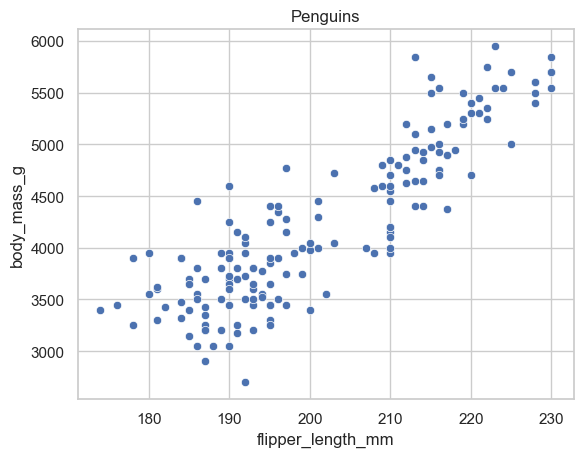

In [117]:
# Simple Plot
sns.scatterplot(data=df, x="flipper_length_mm", y="body_mass_g")
plt.title("Penguins")
plt.show()


### Why the First Plot Is Ineffective

- **No group differentiation**: Viewers can't tell species apart.
- **No size encoding**: Bill shape ratio is ignored.
- **Vague title**: It doesn't tell us what relationship to look for.
- **Missed opportunity for multivariate storytelling**.

This plot fails to reveal structure or patterns. It violates Cairo's call for visualizations that "help us see patterns, trends, and outliers effortlessly," and misses Tufte's principle of "high data density" with "low chartjunk."


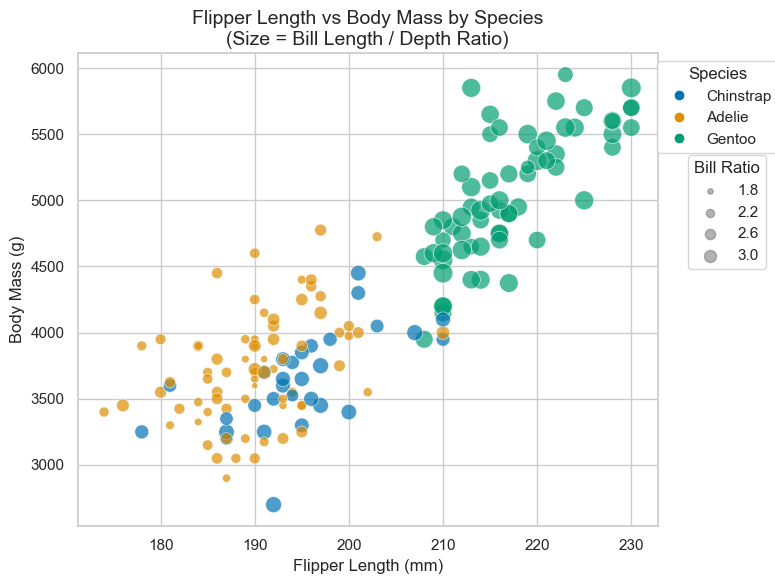

In [118]:
plt.figure(figsize=(8, 6))

# Create the scatterplot with legend=False to prevent duplication
scatter = sns.scatterplot(
    data=df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    size="bill_ratio",
    sizes=(20, 200),
    alpha=0.7,
    palette="colorblind",
    legend=False
)

# Title and axes
plt.title("Flipper Length vs Body Mass by Species\n(Size = Bill Length / Depth Ratio)", fontsize=14)
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)

# Custom legend for species
species_list = df["species"].dropna().unique()
species_palette = dict(zip(species_list, sns.color_palette("colorblind", n_colors=len(species_list))))
species_handles = [plt.Line2D([], [], marker="o", color=species_palette[sp], linestyle="", label=sp) for sp in species_list]

legend1 = plt.legend(handles=species_handles,title="Species",loc="upper right",bbox_to_anchor=(1.22, 1))

plt.gca().add_artist(legend1)

# Custom legend for bill ratio (size) 
ratios = [1.8, 2.2, 2.6, 3.0]
size_handles = [plt.scatter([], [], s=(r - 1.5) * 50, color="gray", alpha=0.6, label=f"{r:.1f}") for r in ratios]

plt.legend(handles=size_handles, title="Bill Ratio", loc="upper right", bbox_to_anchor=(1.2, 0.8))

plt.tight_layout()
plt.show()




### Improvements

- **Multivariate encoding**: Uses x/y position, color (species), and size (bill shape) to show four variables.
- **Perceptual clarity**: Differences between species and body proportions are visually clear.
- **Colorblind-friendly palette**: Follows accessibility best practices.
- **Data density**: More information in the same space - a Tufte principle.
- **Minimal non-data-ink**: Follows the "data-ink ratio" guideline - no unnescary grid clutter or decoration.
- **Cognitive efficiency**: Aids visual search by separating key visual channels

> "Above all else show the data." - Edward Tufte  

This visualization transforms a flat chart into an analytical tool that lets viewers explore how species and morphology interact - clearly, efficiently, and meaningfully.

### What Seaborn Features Were Used to Improve the Plot

- `sns.scatterplot` to create the scatterplot.
- `hue="species"` differentiates groups using color.
- `size="bill_ratio"` encodes a fourth variable using marker size.
- `palette="colorblind"` ensures accessibility for all viewers.
- Manual legend customization using `plt.legend()` enables labeled bill ratio sizes and clearer species grouping. 



## Plot 3: Heatmap
### Exploring Relationships Between Penguin Features

This visualization explores how different numerical features in the penguin dataset correlate with one another. 

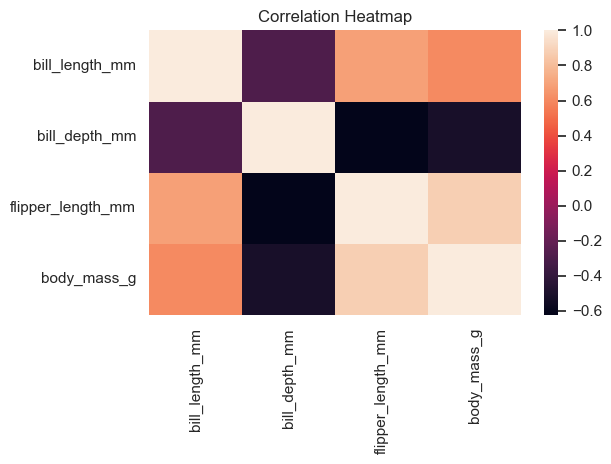

In [119]:
df=df.drop('bill_ratio', axis=1)


sns.heatmap(df.corr(numeric_only=True))
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


### Why This Plot is Ineffective

- **Poor Color Encoding**: The default colormap isn’t perceptually uniform and may mislead viewers, especially in grayscale prints.
- **Redundant Display**: Both halves of the symmetric matrix are shown, doubling the information and creating unnecessary visual repetition.
- **No Data Labels**: Correlation values are not annotated, requiring the viewer to guess based on color.
- **Visual Clutter**: Excessive grid lines and no clear hierarchy reduce readability-violating principles of visual economy and data-ink maximization.

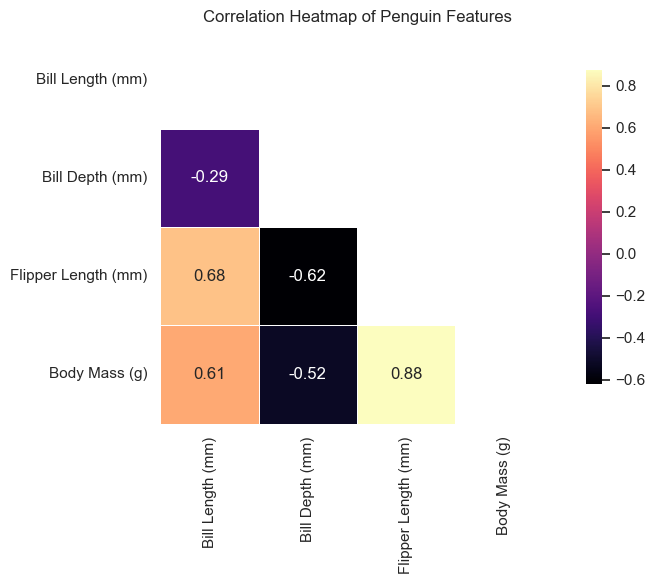

In [120]:
df = df.rename(columns={
    "bill_length_mm": "Bill Length (mm)",
    "bill_depth_mm": "Bill Depth (mm)",
    "flipper_length_mm": "Flipper Length (mm)",
    "body_mass_g": "Body Mass (g)",
})


plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True,fmt=".2f",cmap='magma',mask=mask,square=True,linewidths=0.5,cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap of Penguin Features")
plt.grid(False)
plt.tight_layout()
plt.show()


### Improvements

- **Perceptual clarity**: Correlation values are labeled directly and use a perceptually uniform colormap, reducing ambiguity in color interpretation.
- **Minimal non-data-ink**: The upper triangle is masked and grid clutter removed, aligning with Tufte’s data-ink ratio and the "erase redundant ink" principle.
- **Accessibility-aware design**: The magma palette is colorblind-friendly and prints well in grayscale, addressing Cairo's concerns about colormap pitfalls and print robustness.

This visualization transforms a raw correlation matrix into a clean, insightful analytical tool that invites viewers to explore how penguin traits relate to one another - clearly, efficiently, and meaningfully.

### What Seaborn Features Were Used to Improve the Plot

This version of the heatmap leverages several powerful Seaborn options:

- `sns.heatmap` to create the heatmap.
- `annot=True` displays the exact correlation values inside each cell.
- `cmap="magma"` uses a perceptually uniform, colorblind-safe colormap.
- `mask=np.triu(...)` hides the redundant upper triangle of the symmetric matrix.
- `linewidths=0.5` and `square=True` provide clean separation between cells with a uniform layout.
- `cbar_kws={"shrink": 0.8}` resizes the colorbar to reduce visual dominance.
- Axis labels were renamed in the DataFrame to include units and improve readability.

Together, these Seaborn customizations helped turn a generic heatmap into a clear and interpretable visualization aligned with core data visualization principles.

## Final Takeaways: How Seaborn Improves Visualizations

Seaborn provides a powerful and flexible interface for making clear, effective, and aesthetically pleasing visualizations. Throughout this tutorial, we used Seaborn features to transform default plots into thoughtful tools for analysis. Here are the main ways Seaborn helps elevate data visualizations:

- **Semantic Mapping**  
  Use `hue`, `size`, and `style` to encode multiple variables in a single plot, allowing for multivariate storytelling.

- **Built-in Color Palettes**  
  Access colorblind-friendly and perceptually uniform palettes like `"colorblind"`, `"mako"`, `"rocket"`, and more, to ensure accessibility and clarity.

- **Annotation and Labeling**  
  Features like `annot=True` (for heatmaps) and manual legend placement make it easy to include contextual details directly in the plot.

- **Smart Defaults with Easy Customization**  
  Seaborn plots look polished by default but can be easily customized using parameters like `linewidth`, `marker`, `width`, `palette`, or by layering with Matplotlib.

- **Visual Hierarchy Control**  
  Seaborn lets you adjust elements like plot width, marker opacity, gridlines, and annotations to focus the viewer’s attention and reduce clutter - aligning with principles from Tufte and Cairo.

- **High-Level API for Complex Plots**  
  Functions like `pairplot()`, `catplot()` (not shown in this tutorial), and `heatmap()` abstract away complexity while allowing expressive customization - making it easier to create insightful plots with minimal code.

> By using Seaborn thoughtfully, we can apply core data visualization principles - accessibility, clarity, minimalism, and data-ink efficiency - to create graphics that inform, not just decorate.